# Author - Shreya Jallypally

## Introduction

We will be working with a data set based on Percentage of students(https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv).
### Predictor

* Percentage of marks: The student's marks in percent.(continuous data) 

### Read the data from data set

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

## Plot the data to see the relation between the features and target variable

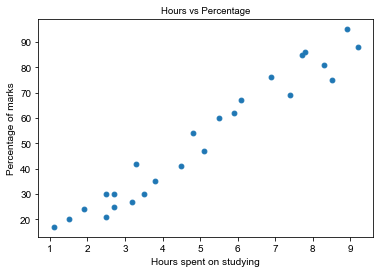

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
a=plt.axes()
sns.set_context('paper')
sns.set_style('dark')
a.plot(data['Hours'],data['Scores'],marker='o',ls='')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours spent on studying')  
plt.ylabel('Percentage of marks')  
plt.show()

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [ ]:
X_data=data['Hours']
Y_data=data['Scores']
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data, test_size=0.2,random_state=0)

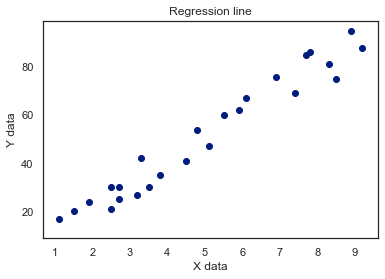

In [31]:
lr = LinearRegression()
lr=lr.fit(X_train.values.reshape(-1,1),Y_train)
eq = lr.coef_*X_data+lr.intercept_
ax=plt.axes()
sns.set_context('notebook')
sns.set_style('white')
ax.scatter(X_data,Y_data)
ax.set(xLabel='X data',yLabel='Y data' ,title='Regression line')
ax.plot(X_data,eq,ls='');

In [8]:

Y_predict=lr.predict(X_test.values.reshape(-1,1))
Y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [9]:
lr.score(X_train.values.reshape(-1,1),Y_train)

0.9515510725211552

In [10]:
lr.intercept_

2.018160041434683

In [11]:
lr.coef_

array([9.91065648])

In [32]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':Y_predict},columns=['Actual','Predicted'])
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Plot the graph between actual and predicted to check how far it's same

[Text(0, 0.5, 'predict'),
 Text(0.5, 0, 'Ytest data'),
 Text(0.5, 1.0, 'Actual vs Predicted')]

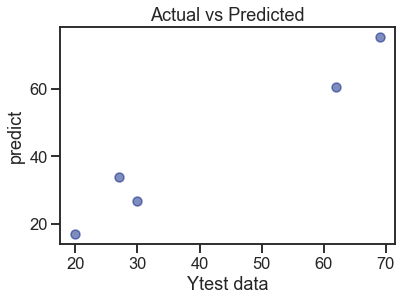

In [13]:

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
a=plt.axes()
a.scatter(df['Actual'],df['Predicted'],alpha=.5)
a.set(xlabel='Ytest data',ylabel='predict',title='Actual vs Predicted')


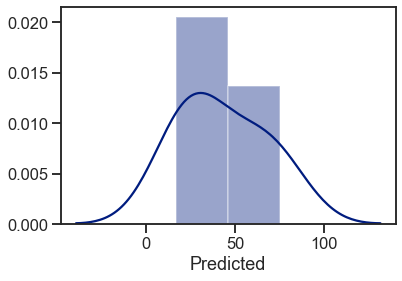

In [14]:
sns.distplot(df['Predicted'])

### What will be predicted score if a student studies for 9.25

In [16]:
newdata=pd.Series(9.25,name='Hours')
percentage=lr.predict(newdata.values.reshape(-1,1))

In [17]:
print('The percentage of student with 9.25 hours of studying per day is :',percentage)

The percentage of student with 9.25 hours of studying per day is : [93.69173249]


In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.9454906892105356

In [19]:
lr.score(X_test.values.reshape(-1,1),Y_test)

0.9454906892105356